# EDA

Exploratory Data Analysis is a process of examining or understanding the data and extracting insights or main characteristics of the data.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [16]:
df=pd.read_csv("2015.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Exploratory Data Analysis
Technically, The primary motive of EDA is to

* Examine the data distribution
* Handling missing values of the dataset(a most common issue with every dataset)
* Handling the outliers
* Removing duplicate data
* Encoding the categorical variables
* Normalizing and Scaling

In [17]:
df.shape

(158, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [20]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [21]:
# 1 Handling missing values

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No missing value in our dataset. 
If missing values are their then
* Drop the missing values – If the dataset is huge and missing values are very few then we can directly drop the values because it will not have much impact.
* Replace with mean values – We can replace the missing values with mean values, but this is not advisable in case if the data has outliers.
* Replace with median values – We can replace the missing values with median values, and it is recommended in case if the data has outliers.
* Replace with mode values – We can do this in the case of a Categorical feature.

In [23]:
# 2 checking for duplicate data
df.duplicated().sum()

0

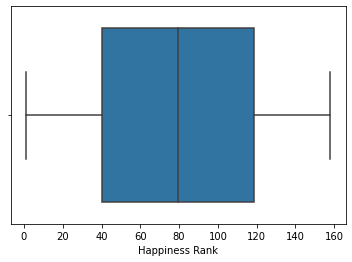

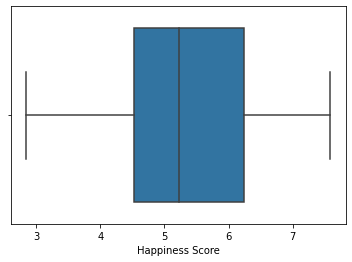

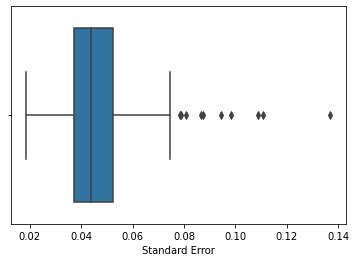

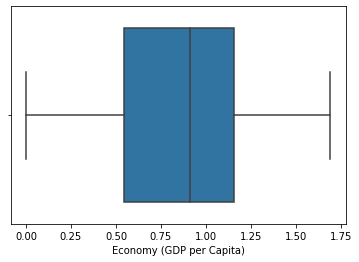

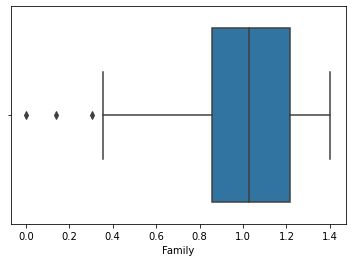

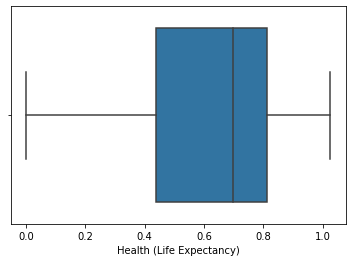

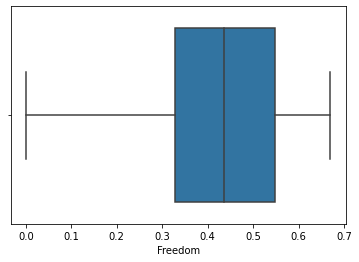

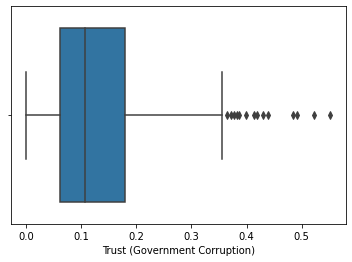

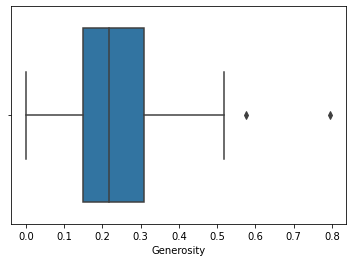

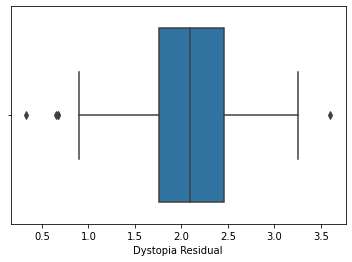

In [35]:
# 3 Handling ouliers
for i in df.columns[2:]:
    sns.boxplot(i,data=df)
    plt.show()

From the box plot we have seen that 5 columns have outliers
* Standard Error
* Family
* Trust (Government Corruption)
* Generosity
* Dystopia Residual

In [5]:
def remove_out(colum):
    sorted(col)
    q1,q3=colum.quantile([0.25,0.75])
    iqr=q3-q1
    l=q1-1.5*iqr
    u=q3+1.5*iqr
    return l,u

In [38]:
l,u=remove_out(df["Standard Error"])

In [39]:
df["Standard Error"]=np.where(df["Standard Error"]>u,u,df["Standard Error"])
df["Standard Error"]=np.where(df["Standard Error"]<l,l,df["Standard Error"])

<AxesSubplot:xlabel='Standard Error'>

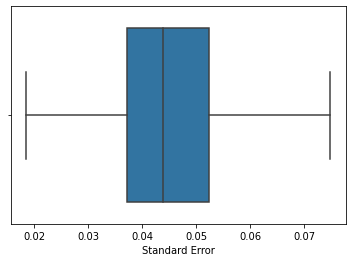

In [40]:
sns.boxplot(df["Standard Error"])

In [41]:
l,u=remove_out(df["Family"])
df["Family"]=np.where(df["Family"]>u,u,df["Family"])
df["Family"]=np.where(df["Family"]<l,l,df["Family"])

<AxesSubplot:xlabel='Family'>

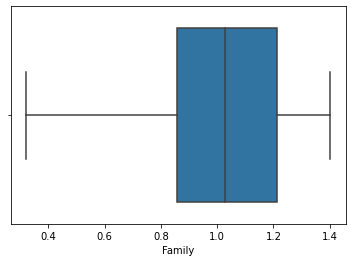

In [42]:
sns.boxplot(df["Family"])

In [43]:
l,u=remove_out(df["Trust (Government Corruption)"])
df["Trust (Government Corruption)"]=np.where(df["Trust (Government Corruption)"]>u,u,df["Trust (Government Corruption)"])
df["Trust (Government Corruption)"]=np.where(df["Trust (Government Corruption)"]<l,l,df["Trust (Government Corruption)"])

<AxesSubplot:xlabel='Trust (Government Corruption)'>

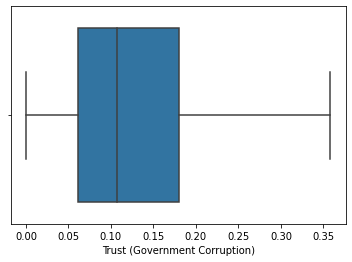

In [44]:
sns.boxplot(df["Trust (Government Corruption)"])

In [45]:
l,u=remove_out(df["Generosity"])
df["Generosity"]=np.where(df["Generosity"]>u,u,df["Generosity"])
df["Generosity"]=np.where(df["Generosity"]<l,l,df["Generosity"])

<AxesSubplot:xlabel='Generosity'>

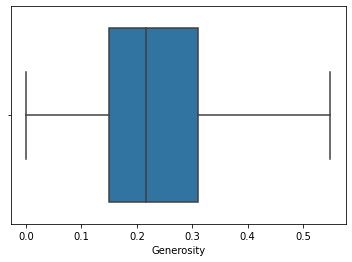

In [46]:
sns.boxplot(df["Generosity"])

In [47]:
l,u=remove_out(df["Dystopia Residual"])
df["Dystopia Residual"]=np.where(df["Dystopia Residual"]>u,u,df["Dystopia Residual"])
df["Dystopia Residual"]=np.where(df["Dystopia Residual"]<l,l,df["Dystopia Residual"])

<AxesSubplot:xlabel='Dystopia Residual'>

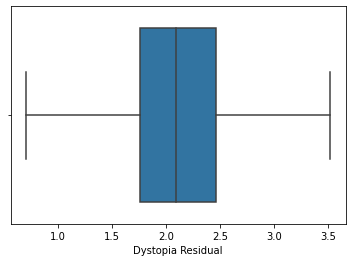

In [48]:
sns.boxplot(df["Dystopia Residual"])

In [49]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.358125,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.141450,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.358125,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.358125,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.329570,0.45811,2.45176


In [50]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.208155,-0.785267,-0.741520,-0.735613,-0.556886,-0.386326,-0.180778,-0.522093
Happiness Score,-0.992105,1.000000,-0.227659,0.780966,0.746684,0.724200,0.568211,0.408790,0.200097,0.528834
Standard Error,0.208155,-0.227659,1.000000,-0.238071,-0.153450,-0.340113,-0.171484,-0.163425,-0.104215,0.042574
Economy (GDP per Capita),-0.785267,0.780966,-0.238071,1.000000,0.647390,0.816478,0.370300,0.308857,0.007177,0.038543
Family,-0.741520,0.746684,-0.153450,0.647390,1.000000,0.526748,0.458894,0.216431,0.105980,0.152568
Health (Life Expectancy),-0.735613,0.724200,-0.340113,0.816478,0.526748,1.000000,0.360477,0.247046,0.120891,0.020947
Freedom,-0.556886,0.568211,-0.171484,0.370300,0.458894,0.360477,1.000000,0.495024,0.390296,0.057050
Trust (Government Corruption),-0.386326,0.408790,-0.163425,0.308857,0.216431,0.247046,0.495024,1.000000,0.290557,-0.003508
Generosity,-0.180778,0.200097,-0.104215,0.007177,0.105980,0.120891,0.390296,0.290557,1.000000,-0.081867
Dystopia Residual,-0.522093,0.528834,0.042574,0.038543,0.152568,0.020947,0.057050,-0.003508,-0.081867,1.000000


<AxesSubplot:>

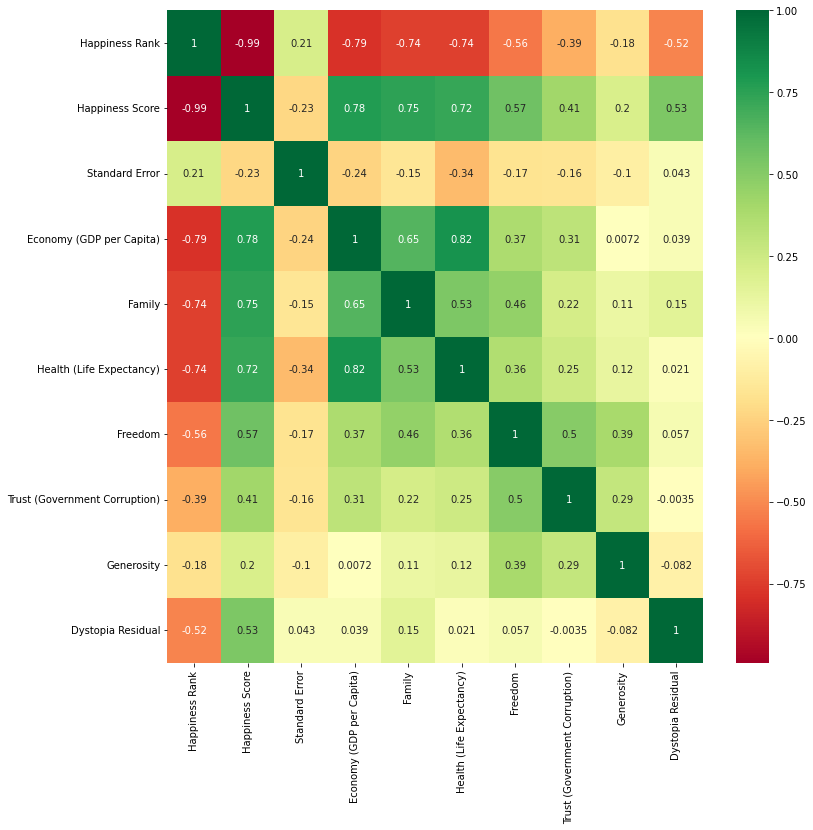

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap="RdYlGn",annot=True)